In [1]:
print('New')

New


In [3]:
print('Hi')

Hi


In [ ]:
import rioxarray  # for working with raster data and masking
import rasterio  # for working with geospatial rasters
import xarray as xr

In [ ]:
rain = pd.read_csv('daily_avg_rainfall_up_2017_to_2023.csv', parse_dates=['date'], index_col='date')
rain = rain.resample('SME').mean()

tmax = pd.read_csv('daily_avg_tmax_up_2017_to_2023.csv', parse_dates=['date'], index_col='date')
tmax = tmax.resample('SME').mean()

In [ ]:
e_all = pd.read_csv('NITI_Aayog_all.csv', parse_dates=['date'], index_col='date')
avg_d = e_all.resample('d').mean()
avg_day = avg_d['2017-01-01':'2023-12-31']
ele = avg_day.resample('SME').mean()
e_all#.head(2)

,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chandigarh (UT),Chhattisgarh,DNH (UT),Delhi (UT),Goa,Gujarat,...,Pondicherry (UT)/Population,Punjab/Population,Rajasthan/Population,Sikkim/Population,Tamil Nadu/Population,Telangana/Population,Tripura/Population,UP/Population,Uttarakhand/Population,West Bengal/Population
date,,,,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,5336.69,95.00,801.33,2468.86,110.59,2574.13,898.02,1775.69,242.15,10132.63,...,178.468260,104.696847,117.612018,59.173536,144.166156,144.370845,48.653794,58.996756,101.560613,40.588493
2017-01-01 01:00:00,5298.24,95.00,773.54,2401.92,99.58,2575.35,896.69,1565.98,233.27,10130.93,...,178.396141,99.464960,112.671278,56.110859,140.645291,138.380045,44.127290,56.291818,98.662621,37.766287
2017-01-01 02:00:00,5193.17,95.00,739.62,2376.23,93.80,2529.59,888.63,1458.04,234.11,9829.56,...,175.070696,97.159542,110.295002,52.802513,137.305860,135.038111,40.395578,54.612393,93.315760,35.978416
2017-01-01 03:00:00,5136.10,95.00,723.57,2276.16,94.26,2517.46,881.76,1413.88,229.89,9595.83,...,173.636347,97.570811,107.904284,52.540466,135.805174,136.702222,39.246940,54.289590,92.276726,35.541609
2017-01-01 04:00:00,5533.07,95.00,725.32,2303.02,97.96,2520.96,885.62,1441.43,222.27,9482.91,...,172.394313,102.307084,100.582600,54.358418,138.819713,140.261562,38.876763,55.120870,96.219701,35.662451
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-30 19:00:00,8909.42,118.95,1742.18,5686.64,204.83,5922.05,1207.95,3937.19,597.46,18612.44,...,339.363742,242.661139,170.750648,148.384233,244.652621,258.004917,57.494494,103.909398,195.888638,108.547236
2024-04-30 20:00:00,8881.86,118.95,1713.84,5646.58,193.22,5773.07,1172.28,3753.42,598.62,17867.36,...,328.033187,221.622214,171.266487,131.154629,237.730645,254.396438,55.488461,103.827121,186.969602,107.410466
2024-04-30 21:00:00,9458.95,118.95,1614.30,5545.73,171.13,5680.85,1186.52,3543.18,591.86,17842.75,...,334.315475,207.125040,164.669546,118.854788,236.801154,261.920506,56.392129,101.912824,182.546767,107.176669


In [ ]:
rolling_mean_15d_ele = avg_day['UP'].rolling(window=15).mean()

In [ ]:
rolling_mean_15d_ele.head(20)

date
2017-01-01             NaN
2017-01-02             NaN
2017-01-03             NaN
2017-01-04             NaN
2017-01-05             NaN
2017-01-06             NaN
2017-01-07             NaN
2017-01-08             NaN
2017-01-09             NaN
2017-01-10             NaN
2017-01-11             NaN
2017-01-12             NaN
2017-01-13             NaN
2017-01-14             NaN
2017-01-15    11969.009944
2017-01-16    11983.267167
2017-01-17    12021.692889
2017-01-18    12053.937083
2017-01-19    12059.449472
2017-01-20    12077.241750
Freq: D, Name: UP, dtype: float64

In [ ]:
avg_day

In [ ]:
avg_day['UP_detrended'] = avg_day['UP'] - rolling_mean_15d_ele

/var/folders/7m/3_wyf70n09zfl80wl2bdg87c0000gn/T/ipykernel_1553/1510936026.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  avg_day['UP_detrended'] = avg_day['UP'] - rolling_mean_15d_ele


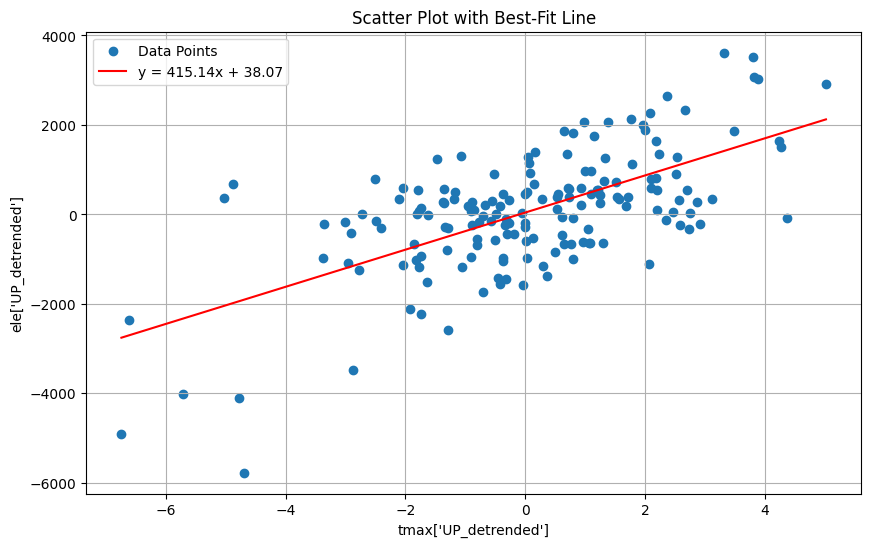

Equation of the best-fit line: y = 415.14x + 38.07


In [ ]:
tmax = pd.read_csv('daily_avg_tmax_up_2017_to_2023.csv', parse_dates=['date'], index_col='date')
rolling_mean_15d_tmax = tmax['average_tmax'].rolling(window=15).mean()
tmax['UP_detrended'] = tmax['average_tmax'] - rolling_mean_15d_tmax


e_all = pd.read_csv('NITI_Aayog_all.csv', parse_dates=['date'], index_col='date')
avg_d = e_all.resample('d').mean()
avg_day = avg_d['2017-01-01':'2023-12-31']
rolling_mean_15d_ele = avg_day['UP'].rolling(window=15).mean()
ele['UP_detrended'] = avg_day['UP'] - rolling_mean_15d_ele



# Prepare the data for the scatter plot
x = tmax['UP_detrended']
y = ele['UP_detrended']

# Ensure x and y have the same length by taking the common dates
# This will only include data where both tmax and ele have values
common_dates = x.index.intersection(y.index) 
x = x.loc[common_dates]
y = y.loc[common_dates]

# Calculate the best-fit line
coefficients = np.polyfit(x, y, 1)
slope = coefficients[0]
intercept = coefficients[1]
line_equation = f"y = {slope:.2f}x + {intercept:.2f}"

# Generate points for the best fit line
x_line = np.linspace(min(x), max(x), 100)  # Generate 100 points for a smoother line
y_line = slope * x_line + intercept


# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Data Points')
plt.plot(x_line, y_line, color='red', label=line_equation)

# Add labels and title
plt.xlabel("tmax['UP_detrended']")
plt.ylabel("ele['UP_detrended']")
plt.title("Scatter Plot with Best-Fit Line")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

print(f"Equation of the best-fit line: {line_equation}")

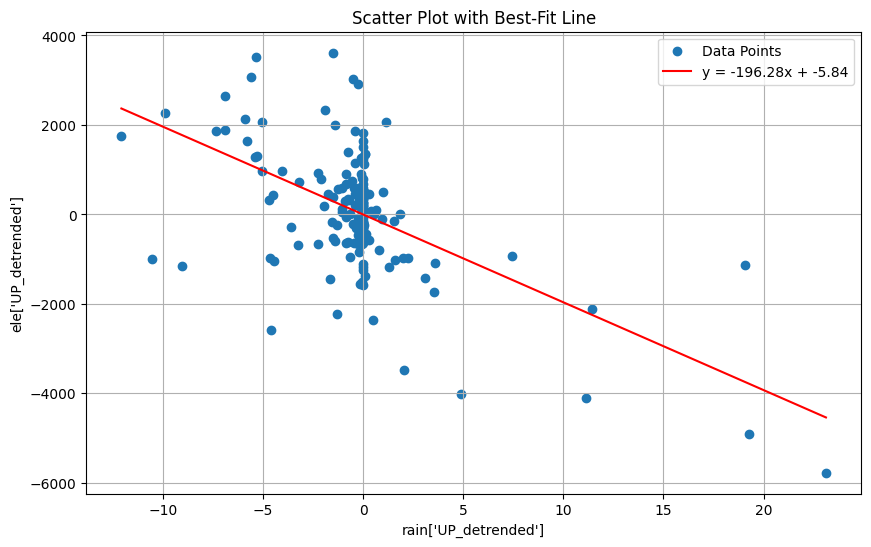

Equation of the best-fit line: y = -196.28x + -5.84


In [ ]:
e_all = pd.read_csv('NITI_Aayog_all.csv', parse_dates=['date'], index_col='date')
avg_d = e_all.resample('d').mean()
avg_day = avg_d['2017-01-01':'2023-12-31']
rolling_mean_15d_ele = avg_day['UP'].rolling(window=15).mean()
ele['UP_detrended'] = avg_day['UP'] - rolling_mean_15d_ele


rain = pd.read_csv('daily_avg_rainfall_up_2017_to_2023.csv', parse_dates=['date'], index_col='date')
rolling_mean_15d_rain = rain['average_rain'].rolling(window=15).mean()
rain['UP_detrended'] = rain['average_rain'] - rolling_mean_15d_rain



# Prepare the data for the scatter plot
x = rain['UP_detrended']
y = ele['UP_detrended']

# Ensure x and y have the same length by taking the common dates
common_dates = x.index.intersection(y.index)
x = x.loc[common_dates]
y = y.loc[common_dates]

# Remove NaN values
x = x.dropna()
y = y.dropna()

# Recalculate common dates after removing NaNs
common_dates = x.index.intersection(y.index)
x = x.loc[common_dates]
y = y.loc[common_dates]


# Calculate the best-fit line
coefficients = np.polyfit(x, y, 1)
slope = coefficients[0]
intercept = coefficients[1]
line_equation = f"y = {slope:.2f}x + {intercept:.2f}"

# Generate points for the best fit line
x_line = np.linspace(min(x), max(x), 100)
y_line = slope * x_line + intercept

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Data Points')
plt.plot(x_line, y_line, color='red', label=line_equation)

# Add labels and title
plt.xlabel("rain['UP_detrended']")
plt.ylabel("ele['UP_detrended']")
plt.title("Scatter Plot with Best-Fit Line")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

print(f"Equation of the best-fit line: {line_equation}")

In [4]:
4

4

In [5]:
8

8

In [ ]:
jan1_e = ele['2017-01-01'::24]
jan2_e = ele['2017-01-16'::24]
feb1_e = ele['2017-02-01'::24]
feb2_e = ele['2017-02-16'::24]
mar1_e = ele['2017-03-01'::24]
mar2_e = ele['2017-03-16'::24]
apr1_e = ele['2017-04-01'::24]
apr2_e = ele['2017-04-16'::24]
may1_e = ele['2017-05-01'::24]
may2_e = ele['2017-05-16'::24]
jun1_e = ele['2017-06-01'::24]
jun2_e = ele['2017-06-16'::24]
jul1_e = ele['2017-07-01'::24]
jul2_e = ele['2017-07-16'::24]
aug1_e = ele['2017-08-01'::24]
aug2_e = ele['2017-08-16'::24]
sep1_e = ele['2017-09-01'::24]
sep2_e = ele['2017-09-16'::24]
oct1_e = ele['2017-10-01'::24]
oct2_e = ele['2017-10-16'::24]
nov1_e = ele['2017-11-01'::24]
nov2_e = ele['2017-11-16'::24]
dec1_e = ele['2017-12-01'::24]
dec2_e = ele['2017-12-16'::24]

In [ ]:
jan1_e

,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chandigarh (UT),Chhattisgarh,DNH (UT),Delhi (UT),Goa,Gujarat,...,Pondicherry (UT)/Population,Punjab/Population,Rajasthan/Population,Sikkim/Population,Tamil Nadu/Population,Telangana/Population,Tripura/Population,UP/Population,Uttarakhand/Population,West Bengal/Population
date,,,,,,,,,,,,,,,,,,,,,
2017-01-15,5965.306849,93.748490,895.433932,2500.562865,168.694036,2891.492292,922.606068,2739.188802,302.791953,11374.565234,...,188.817124,143.919041,118.804619,84.265921,147.980902,182.456356,55.444351,60.098611,126.182505,50.093951
2018-01-15,6785.695937,77.213594,918.100807,2928.008984,159.366589,2834.534740,1003.270339,2750.213880,382.902344,12353.997891,...,203.302804,157.173740,129.952768,113.074651,150.607446,203.037817,35.964623,62.346543,163.654289,49.622666
2019-01-15,6653.377995,94.892135,918.545026,2949.086536,170.822995,3141.142448,1008.167891,2891.443880,415.017656,13253.105859,...,225.415641,161.949181,134.427539,106.090266,161.205143,202.578558,42.465809,57.349239,173.740472,55.871993
2020-01-15,7341.488672,91.881198,916.260495,3224.868594,178.912630,3252.095495,1055.041823,3039.392318,413.047812,13346.211224,...,223.809803,161.032025,142.442338,157.960984,158.741835,256.355167,39.551919,58.172820,181.966137,54.201283
2021-01-15,7605.685964,107.773724,985.630104,3630.598568,170.928984,3707.975469,1096.003073,3051.072057,419.090885,14310.796667,...,233.248843,189.377743,160.149955,124.677875,156.623302,280.541679,40.122517,64.199026,170.969155,59.083170
2022-01-15,7432.492292,113.763099,1015.169271,3614.696484,170.928984,3316.682161,1081.780859,3086.802292,392.594219,14332.071745,...,236.991117,181.384600,159.246005,121.806231,166.203775,236.555866,40.200700,67.218863,172.672896,54.500006
2023-01-15,8295.495260,112.086120,1092.617214,3772.187266,180.960573,4325.416849,1146.162318,3199.831406,502.481120,15462.919349,...,237.664971,219.669789,183.671918,132.876830,172.098434,277.061397,43.747359,69.105767,178.977210,62.792040


In [ ]:
may1_e['UP'].to_frame()

,UP
date,
2017-05-15,15080.732578
2018-05-15,16483.593932
2019-05-15,17503.966250
2020-05-15,15827.955365
2021-05-15,13705.457969
2022-05-15,18757.664661
2023-05-15,19340.812318


In [ ]:
may1_tmax = tmax['2017-05-01'::24]
may1_tmax

,average_tmax
date,
2017-05-15,39.718697
2018-05-15,41.302891
2019-05-15,40.580790
2020-05-15,40.172320
2021-05-15,34.894629
2022-05-15,39.143106
2023-05-15,38.198342


In [ ]:
from scipy.stats import linregress

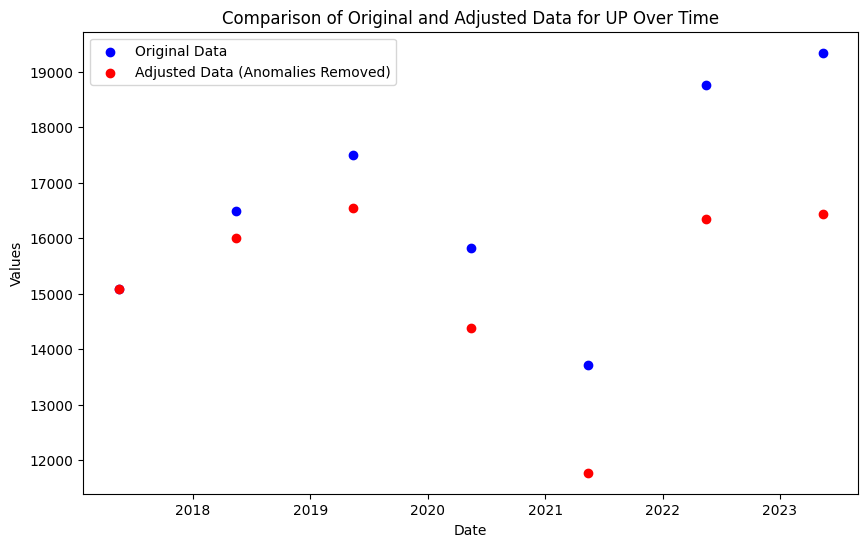

Original Values:
[15080.732578 16483.593932 17503.96625  15827.955365 13705.457969
 18757.664661 19340.812318]

Adjusted Values:
[15080.732578   16000.85866724 16538.49572047 14378.42700834
 11773.19434757 16342.66577481 16443.07816704]


In [ ]:
# Define the data for UP
data = pd.DataFrame({
    'date': pd.to_datetime([
        '2017-05-15', '2018-05-15', '2019-05-15',
        '2020-05-15', '2021-05-15', '2022-05-15',
        '2023-05-15'
    ]),
    'UP': [15080.732578, 16483.593932, 17503.966250,
           15827.955365, 13705.457969, 18757.664661,
           19340.812318]
}).set_index('date')

# Convert index (date) to a numerical format for regression
data['time_numeric'] = data.index.map(pd.Timestamp.toordinal)

# Extract numeric time and values for UP
time = data['time_numeric'].values
values = data['UP'].values

# Step 1: Fit a best-fit line to calculate the slope
slope, intercept, _, _, _ = linregress(time, values)

# Calculate adjusted values by removing anomalies from the 2nd data point onwards
adjusted_values = values.copy()
adjusted_values[1:] = values[1:] - (slope * (time[1:] - time[0]))  # Adjust starting from the 2nd point

# Step 2: Plot both original and adjusted data on the same plot for comparison
plt.figure(figsize=(10, 6))
plt.scatter(data.index, values, color='blue', label='Original Data')
plt.scatter(data.index, adjusted_values, color='red', label='Adjusted Data (Anomalies Removed)')
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Comparison of Original and Adjusted Data for UP Over Time')
plt.legend()
plt.show()

# Step 3: Print original and adjusted values
print("Original Values:")
print(values)
print("\nAdjusted Values:")
print(adjusted_values)

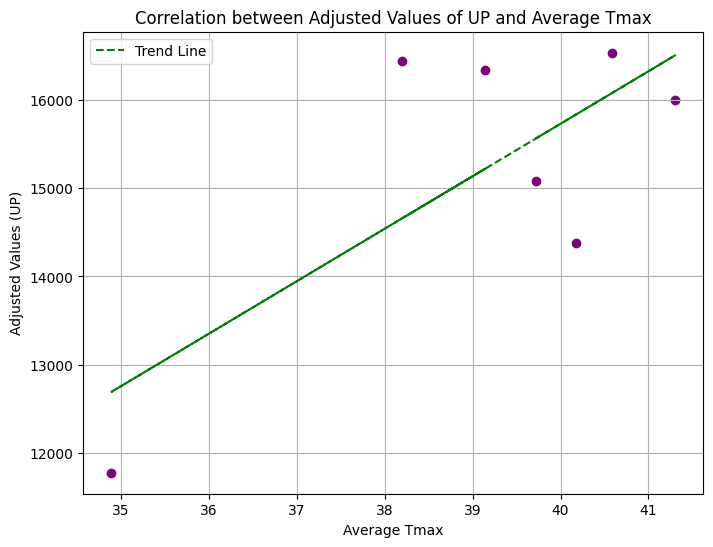

Correlation Coefficient between adjusted_values and average_tmax: 0.7364285564350748


In [ ]:
# Define the data for UP and average_tmax
data_up = pd.DataFrame({'date': pd.to_datetime(['2017-05-15', '2018-05-15', '2019-05-15', '2020-05-15', '2021-05-15', '2022-05-15','2023-05-15']),'UP': [15080.732578, 16483.593932, 17503.966250, 15827.955365, 13705.457969, 18757.664661, 19340.812318]}).set_index('date')

data_tmax = pd.DataFrame({'date': pd.to_datetime(['2017-05-15', '2018-05-15', '2019-05-15', '2020-05-15', '2021-05-15', '2022-05-15','2023-05-15']),'average_tmax': [39.718697, 41.302891, 40.580790, 40.172320, 34.894629, 39.143106,38.198342]}).set_index('date')

# Merge the two datasets on the date index
data = data_up.merge(data_tmax, left_index=True, right_index=True)

# Convert the index (date) to a numerical format for regression
data['time_numeric'] = data.index.map(pd.Timestamp.toordinal)

# Extract numeric time and values for UP
time = data['time_numeric'].values
values = data['UP'].values

# Step 1: Fit a best-fit line to calculate the slope
slope, intercept, _, _, _ = linregress(time, values)

# Calculate adjusted values by removing anomalies from the 2nd data point onwards
adjusted_values = values.copy()
adjusted_values[1:] = values[1:] - (slope * (time[1:] - time[0]))  # Adjust starting from the 2nd point
data['adjusted_values'] = adjusted_values

# Step 2: Plot a scatter plot to show correlation between adjusted_values and average_tmax
plt.figure(figsize=(8, 6))
plt.scatter(data['average_tmax'], data['adjusted_values'], color='purple')
plt.xlabel('Average Tmax')
plt.ylabel('Adjusted Values (UP)')
plt.title('Correlation between Adjusted Values of UP and Average Tmax')
plt.grid(True)

# Optional: Fit a linear trend line on the scatter plot
trend_slope, trend_intercept, _, _, _ = linregress(data['average_tmax'], data['adjusted_values'])
plt.plot(data['average_tmax'], trend_slope * data['average_tmax'] + trend_intercept, color='green', linestyle='--', label='Trend Line')
plt.legend()

plt.show()

# Print the correlation coefficient
correlation_coefficient = np.corrcoef(data['average_tmax'], data['adjusted_values'])[0, 1]
print("Correlation Coefficient between adjusted_values and average_tmax:", correlation_coefficient)

In [ ]:
adjusted_values

array([15080.732578  , 16000.85866724, 16538.49572047, 14378.42700834,
       11773.19434757, 16342.66577481, 16443.07816704])

In [ ]:
may1_rain = rain['2017-05-01'::24]
may1_rain

,average_rain
date,
2017-05-15,1.057294
2018-05-15,0.174670
2019-05-15,0.055051
2020-05-15,0.313655
2021-05-15,5.480520
2022-05-15,1.348729
2023-05-15,0.895039


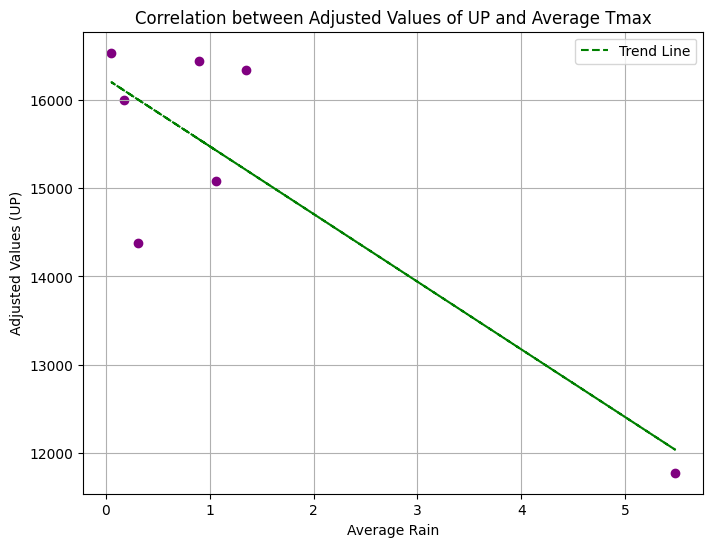

Correlation Coefficient between adjusted_values and average_rain: -0.8461904095712126


In [ ]:
# Define the data for UP and average_tmax
data_up = pd.DataFrame({'date': pd.to_datetime(['2017-05-15', '2018-05-15', '2019-05-15','2020-05-15', '2021-05-15', '2022-05-15','2023-05-15']),'UP': [15080.732578, 16483.593932, 17503.966250,15827.955365, 13705.457969, 18757.664661,19340.812318]}).set_index('date')
data_tmax = pd.DataFrame({'date': pd.to_datetime(['2017-05-15', '2018-05-15', '2019-05-15','2020-05-15', '2021-05-15', '2022-05-15','2023-05-15']),'average_tmax': [1.057294, 0.174670, 0.055051,0.3136550, 5.480520, 1.348729,0.895039]}).set_index('date')

# Merge the two datasets on the date index
data = data_up.merge(data_tmax, left_index=True, right_index=True)

# Convert the index (date) to a numerical format for regression
data['time_numeric'] = data.index.map(pd.Timestamp.toordinal)

# Extract numeric time and values for UP
time = data['time_numeric'].values
values = data['UP'].values

# Step 1: Fit a best-fit line to calculate the slope
slope, intercept, _, _, _ = linregress(time, values)

# Calculate adjusted values by removing anomalies from the 2nd data point onwards
adjusted_values = values.copy()
adjusted_values[1:] = values[1:] - (slope * (time[1:] - time[0]))  # Adjust starting from the 2nd point
data['adjusted_values'] = adjusted_values

# Step 2: Plot a scatter plot to show correlation between adjusted_values and average_tmax
plt.figure(figsize=(8, 6))
plt.scatter(data['average_tmax'], data['adjusted_values'], color='purple')
plt.xlabel('Average Rain')
plt.ylabel('Adjusted Values (UP)')
plt.title('Correlation between Adjusted Values of UP and Average Tmax')
plt.grid(True)

# Optional: Fit a linear trend line on the scatter plot
trend_slope, trend_intercept, _, _, _ = linregress(data['average_tmax'], data['adjusted_values'])
plt.plot(data['average_tmax'], trend_slope * data['average_tmax'] + trend_intercept, color='green', linestyle='--', label='Trend Line')
plt.legend()

plt.show()

# Print the correlation coefficient
correlation_coefficient = np.corrcoef(data['average_tmax'], data['adjusted_values'])[0, 1]
print("Correlation Coefficient between adjusted_values and average_rain:", correlation_coefficient)